## Install Dependencies

In [113]:
# !pip install yfinance
# !pip install get-all-tickers

## Imports

In [114]:
import datetime
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from fbprophet import Prophet
from get_all_tickers import get_tickers as gt


## Download Data from magalu 

In [115]:
data = yfinance.download('MGLU3.SA', start='2018-01-01', end=datetime.datetime.today())

[*********************100%***********************]  1 of 1 completed


## creating dataframe


In [116]:
df=pd.DataFrame()
df['y']=data.Close
df['ds']=data.index

df.head()


,y,ds
Date,,
2018-01-02,2.478125,2018-01-02
2018-01-03,2.446875,2018-01-03
2018-01-04,2.505625,2018-01-04
2018-01-05,2.456250,2018-01-05
2018-01-08,2.456562,2018-01-08


## creating model and fit

In [117]:
model = Prophet(daily_seasonality=True)

In [118]:
model.fit(df)

## predict model and creating future data in 300 periods 

In [119]:
future = model.make_future_dataframe(periods=300)
predictions = model.predict(future)


## plot Result

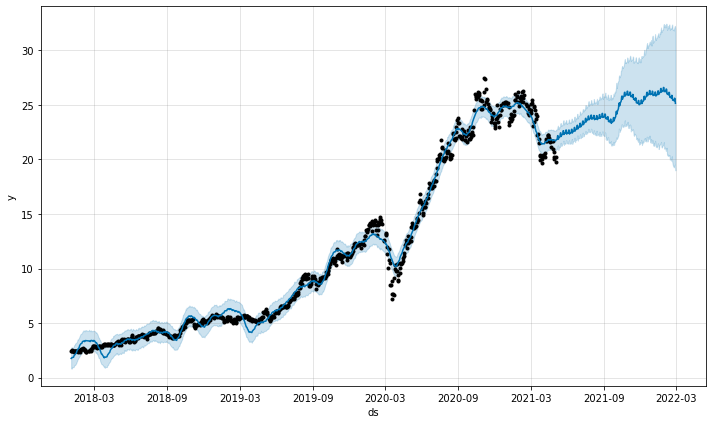

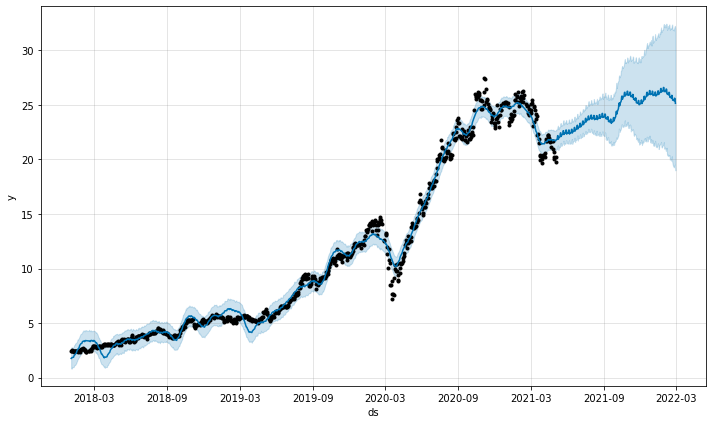

In [120]:
model.plot(predictions)

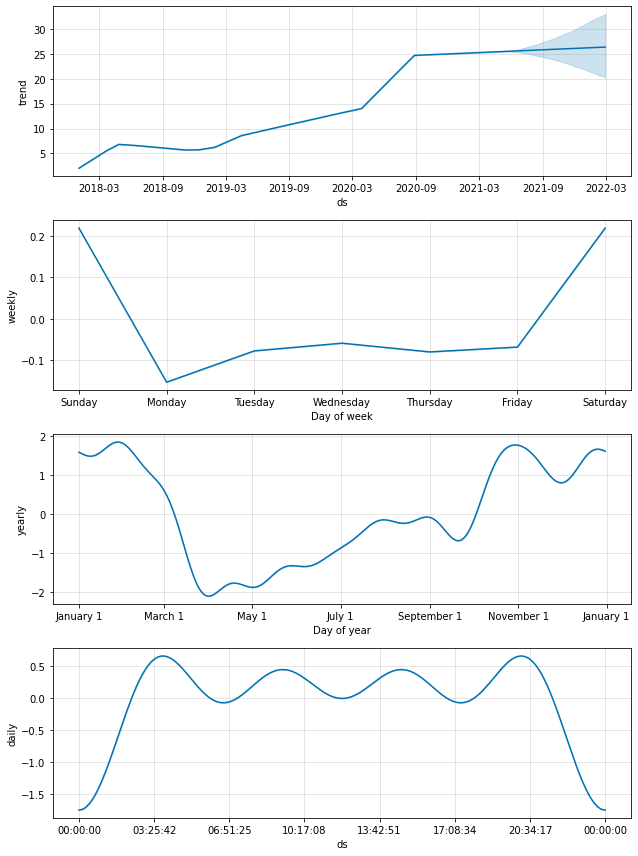

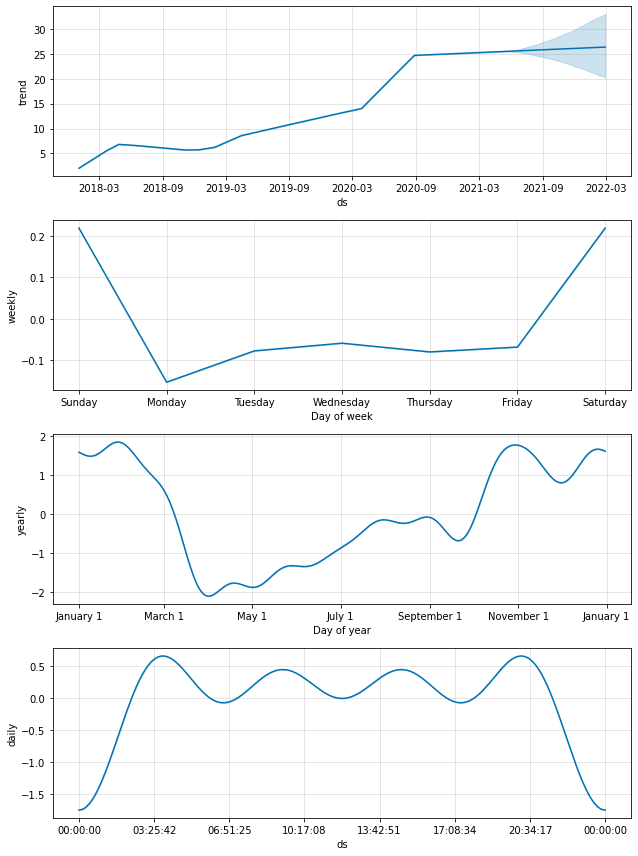

In [121]:
model.plot_components(predictions)

## tail predictions

In [122]:
predictions[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1115,2022-02-24,25.395164,19.266307,31.811441
1116,2022-02-25,25.367156,19.345013,32.025902
1117,2022-02-26,25.611388,19.496774,32.185309
1118,2022-02-27,25.565008,19.513572,32.244922
1119,2022-02-28,25.142640,18.991132,31.936327
